# Energy-level diagrams

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v5/visualization/energy-levels.ipynb

In [2]:
%pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 2.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from qutip import about, qeye, sigmax, sigmaz, tensor

%matplotlib inline

## Energy spectrum of three coupled qubits

In [ ]:
def compute(w1list, w2, w3, g12, g13):

    # Pre-compute operators for the hamiltonian
    sz1 = tensor(sigmaz(), qeye(2), qeye(2))
    sx1 = tensor(sigmax(), qeye(2), qeye(2))

    sz2 = tensor(qeye(2), sigmaz(), qeye(2))
    sx2 = tensor(qeye(2), sigmax(), qeye(2))

    sz3 = tensor(qeye(2), qeye(2), sigmaz())
    sx3 = tensor(qeye(2), qeye(2), sigmax())

    idx = 0
    evals_mat = np.zeros((len(w1list), 2 * 2 * 2))
    for w1 in w1list:
        #w1,g12 = g12,w1

        # evaluate the Hamiltonian
        H = w1 * sz1 + w2 * sz2 + w3 * sz3 + g12 * sx1 * sx2 + g13 * sx1 * sx3 # - g12 * sx1 * sz2

        # find the energy eigenvalues of the composite system
        evals, ekets = H.eigenstates()

        evals_mat[idx, :] = np.real(evals) #save energy

        idx += 1

    return evals_mat

In [101]:
w1 = 1.0 * 2 * pi  # atom 1 frequency: sweep this one
w2 = 0.9 * 2 * pi  # atom 2 frequency
w3 = 1.1 * 2 * pi  # atom 3 frequency
g12 = 0.05 * 2 * pi  # atom1-atom2 coupling strength
g13 = 0.05 * 2 * pi  # atom1-atom3 coupling strength

w1list = np.linspace(0.75, 1.25, 50) * 2 * pi  # atom 1 frequency range
w1list = np.linspace(-100, 100, 200) * 2 * pi  # atom 1 frequency range

In [102]:
evals_mat = compute(w1list, w2, w3, g12, g13)

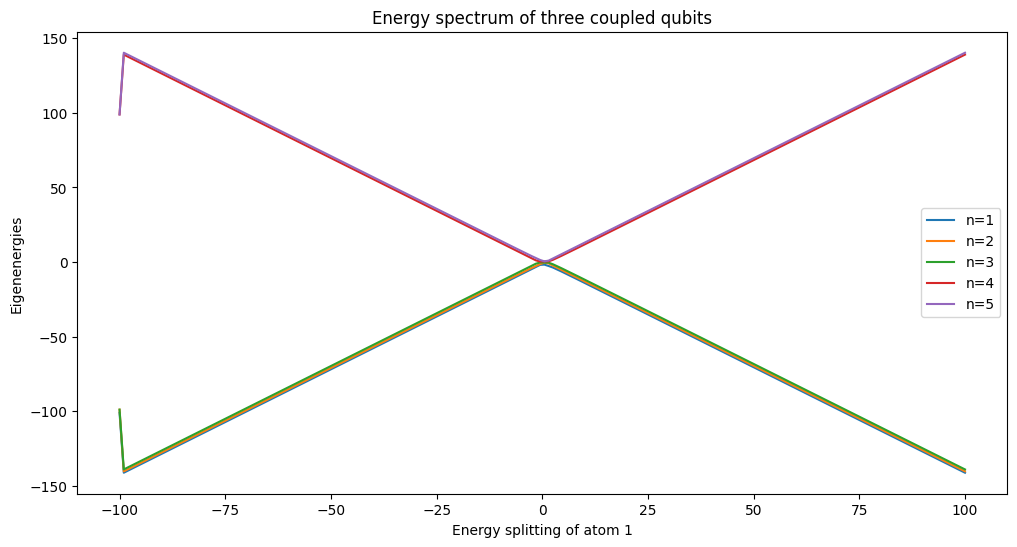

In [115]:
fig, ax = plt.subplots(figsize=(12, 6))

for n in [1, 2, 3,4,5]:
    ax.plot(w1list / (2 * pi),
            (evals_mat[:, n] ) / (2 * pi),label=f'n={n}')

ax.set_xlabel("Energy splitting of atom 1")
ax.set_ylabel("Eigenenergies")
ax.set_title("Energy spectrum of three coupled qubits");
ax.legend()

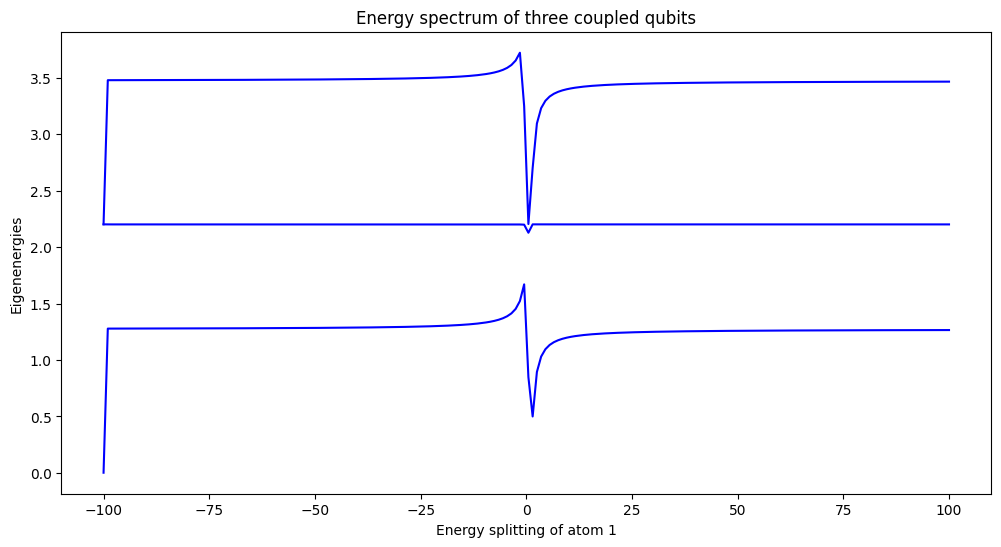

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

for n in [1, 2, 3]:
    ax.plot(w1list / (2 * pi),
            (evals_mat[:, n] - evals_mat[:, 0]) / (2 * pi), "b")

ax.set_xlabel("Energy splitting of atom 1")
ax.set_ylabel("Eigenenergies")
ax.set_title("Energy spectrum of three coupled qubits");

In [ ]:
print(evals_mat)

## Versions

In [104]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.0.4
Numpy Version:      2.1.2
Scipy Version:      1.14.1
Cython Version:     None
Matplotlib Version: 3.9.2
Python Version:     3.12.4
Number of CPUs:     128
BLAS Info:          Generic
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/zwl/gitrepo/ACSE-universal-ansatze/env/lib/python3.12/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex referenc

## 3D plot

In [ ]:
 # Pre-compute operators for the hamiltonian
sz1 = tensor(sigmaz(), qeye(2), qeye(2))
sx1 = tensor(sigmax(), qeye(2), qeye(2))

sz2 = tensor(qeye(2), sigmaz(), qeye(2))
sx2 = tensor(qeye(2), sigmax(), qeye(2))

sz3 = tensor(qeye(2), qeye(2), sigmaz())
sx3 = tensor(qeye(2), qeye(2), sigmax())


def get_energy(w1, w2, w3, g12, g13):

    #evals_mat = np.zeros((len(w1list), 2 * 2 * 2))
    # evaluate the Hamiltonian
    H = w1 * sz1 + w2 * sz2 + w3 * sz3 + g12 * sx1 * sx2 + g13 * sx1 * sx3 # - g12 * sx1 * sz2

    # find the energy eigenvalues of the composite system
    evals, ekets = H.eigenstates()
    return np.real(evals)





In [141]:
L = 1.0
N=50
g13list = np.linspace(-L, L, N) * 2 * pi  # atom 1 frequency range
g12list = np.linspace(-L, L, N) * 2 * pi  # atom 1 frequency range

results=[]
for g12 in g12list:
    _r = []
    for g13 in g13list:
        _ = get_energy(w1, w2, w3, g12, g13)
        _r.append(_)
    results.append(_r)

evals_mat = np.array(results)
#compute(w1list, w2, w3, g12, g13)

In [135]:
print(evals_mat)

[[[-126.51749948 -126.39434819   -6.28318531 ...    6.28318531
    126.39434819  126.51749948]
  [-125.25885601 -125.13319732   -6.38490016 ...    6.38490016
    125.13319732  125.25885601]
  [-124.00062421 -123.87235458   -6.72818899 ...    6.72818899
    123.87235458  124.00062421]
  ...
  [-124.00062421 -123.87235458   -6.72818899 ...    6.72818899
    123.87235458  124.00062421]
  [-125.25885601 -125.13319732   -6.38490016 ...    6.38490016
    125.13319732  125.25885601]
  [-126.51749948 -126.39434819   -6.28318531 ...    6.28318531
    126.39434819  126.51749948]]

 [[-125.25631322 -125.13064427   -6.4351614  ...    6.4351614
    125.13064427  125.25631322]
  [-123.99773062 -123.86950302   -6.28318531 ...    6.28318531
    123.86950302  123.99773062]
  [-122.73956189 -122.60867      -6.38437323 ...    6.38437323
    122.60867     122.73956189]
  ...
  [-122.73956189 -122.60867      -6.38437323 ...    6.38437323
    122.60867     122.73956189]
  [-123.99773062 -123.86950302   -6.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

g12list, g13list = np.meshgrid(g12list, g13list)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(g12list, g13list, evals_mat[:,:,1]-evals_mat[:,:,0], alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(g12list, g13list, evals_mat[:,:,1]-evals_mat[:,:,0])
ax.plot_surface(g12list, g13list, evals_mat[:,:,2]-evals_mat[:,:,0])
#ax.plot_surface(x, y, z2, alpha=0.5, rstride=100, cstride=100)
ax.set_xlabel('X g12')
ax.set_ylabel('Y g13')
ax.set_zlabel('Z energy')
plt.show()

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

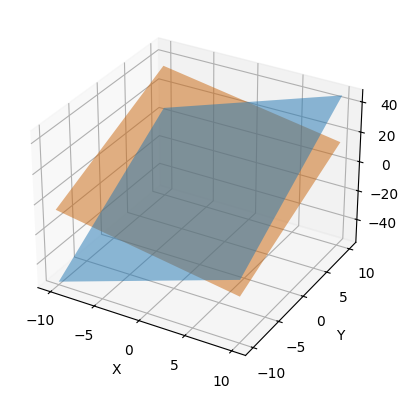

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
print(x)
x, y = np.meshgrid(x, y)
print(x)
z1 = 2 * x + 3 * y - 4
z2 = -x + 2 * y + 5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z1, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(x, y, z2, alpha=0.5, rstride=100, cstride=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()